# Working with data in Python for Beginners  
<img style="float: right; margin: 0px 15px 15px 0px;" src="images\Python.png" alt="Python" width="175"/> 

# Introduction ##

My Name is **Jean-Pierre Voogt**, but you can call me **JP**.
```
Twitter : JP.Voogt
Email   : jvoogt1@outlook.com
Github  : github.com/JVoogt
```

I am a Data Analyst (Aspiring Data Scientist) for a Credit Bureau in South Africa. <img style="float: centre; margin: 0px 15px 15px 0px;" src="images\experian.jpg" alt="Python" width="400"/> 

# IDE's
Learn about the Integrated Development Environment, an application that makes programming easier!
<img style="float: centre" src="images\ide.png" height="100" /> 
```
SOURCES
https://www.codecademy.com/articles/what-is-an-ide
```

## LETS GET STARTED ##

**Import all our required libaries**

In [39]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.mode.chained_assignment = None

```
Numpy: https://numpy.org/
Pandas: https://pandas.pydata.org/
PyPlot: https://matplotlib.org/users/pyplot_tutorial.html
```

**PANDAS DATAFRAMES**

class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)[source]

Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.
```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
```

### Read CSV into Dataframe

In [40]:
dataframe = pd.read_csv("data/PGA_Data_Historical.zip")#, sep = ',', decimal='.')

In [8]:
help(dataframe)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged :: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order
 |         Python 3.6 and later.
 |  
 |  index : Index or array-like
 |      Index

**Display**: Different ways to display the data in a notebook

In [4]:
print(dataframe.head(2))

       Player Name  Season         Statistic                     Variable  \
0  Robert Garrigus    2010  Driving Distance  Driving Distance - (ROUNDS)   
1     Bubba Watson    2010  Driving Distance  Driving Distance - (ROUNDS)   

  Value  
0    71  
1    77  


In [5]:
dataframe.head(3)

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83


**Display only selected columns**

In [9]:
# This will return a Series Object
dataframe["Player Name"].head(5)

0    Robert Garrigus
1       Bubba Watson
2     Dustin Johnson
3    Brett Wetterich
4        J.B. Holmes
Name: Player Name, dtype: object

In [10]:
# This will return a Dataframe Object
dataframe[["Player Name","Season"]].head()
# type(dataframe[["Player Name","Season"]])

,Player Name,Season
0,Robert Garrigus,2010
1,Bubba Watson,2010
2,Dustin Johnson,2010
3,Brett Wetterich,2010
4,J.B. Holmes,2010


In [11]:
# This will return a Series Object
dataframe.Season.head(2)

0    2010
1    2010
Name: Season, dtype: int64

### DDL Modifications ###

Changing the schema layout of your Dataframe

In [12]:
dataframe.rename(columns = {'Value':'Distance'}).head(3)


,Player Name,Season,Statistic,Variable,Distance
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83


In [13]:
dataframe.head(3)

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83


In [14]:
dataframe.rename(columns = {'Value':'Distance'}, inplace=True)


In [ ]:
dataframe = dataframe.rename(columns = {'Value':'Distance'})

### Altering Data Types ###
```
https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
```

In [15]:
Distance = dataframe.query('Variable=="Driving Distance - (AVG.)"')
Distance.dtypes

Player Name    object
Season          int64
Statistic      object
Variable       object
Distance       object
dtype: object

In [18]:
Distance[["Distance"]] = Distance[["Distance"]].apply(pd.to_numeric)
Distance.dtypes

Player Name     object
Season           int64
Statistic       object
Variable        object
Distance       float64
dtype: object

### Rename a column
**Remember to set inplace=True**

In [19]:
column_names = {"Player Name":"PlayerName","Season":"Season_YY"}

Distance.rename(columns=column_names, inplace=True)
Distance.head()

,PlayerName,Season_YY,Statistic,Variable,Distance
192,Robert Garrigus,2010,Driving Distance,Driving Distance - (AVG.),315.5
193,Bubba Watson,2010,Driving Distance,Driving Distance - (AVG.),309.8
194,Dustin Johnson,2010,Driving Distance,Driving Distance - (AVG.),308.5
195,Brett Wetterich,2010,Driving Distance,Driving Distance - (AVG.),307.3
196,J.B. Holmes,2010,Driving Distance,Driving Distance - (AVG.),307.2


**Drop a column**

In [20]:
Distance.drop("Statistic", axis = 1, inplace=True)
Distance.head()

,PlayerName,Season_YY,Variable,Distance
192,Robert Garrigus,2010,Driving Distance - (AVG.),315.5
193,Bubba Watson,2010,Driving Distance - (AVG.),309.8
194,Dustin Johnson,2010,Driving Distance - (AVG.),308.5
195,Brett Wetterich,2010,Driving Distance - (AVG.),307.3
196,J.B. Holmes,2010,Driving Distance - (AVG.),307.2


## Sorting Data ##

**sort by name**

In [29]:
dataframe.sort_values(by='Player Name').head()

,Player Name,Season,Statistic,Variable,Distance
2605938,A.J. McInerney,2018,Consecutive Par 3 Birdies,Consecutive Par 3 Birdies - (NUMBER OF HOLES),1
2675982,A.J. McInerney,2018,FedExCup Season Points for Non-Members,FedExCup Season Points for Non-Members - (WGC ...,NaN
2511827,A.J. McInerney,2018,Consecutive Fairways Hit,Consecutive Fairways Hit - (CURRENT STREAK),NaN
2522325,A.J. McInerney,2018,First Tee Late Lowest Round,First Tee Late Lowest Round - (ROUNDS),12
2470013,A.J. McInerney,2018,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (EVENTS),4


## Data Slicing ##

In [30]:
dataframe.Season.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [22]:
#dataframe[["Season"]].unique()
dataframe["Season"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

### loc vs iloc
```
loc gets rows (or columns) with particular labels from the index.
iloc gets rows (or columns) at particular positions in the index (so it only takes integers)
```

#### loc ####
```
.loc[from row:to row, [columns list]]
```

In [25]:
dataframe.loc[:,["Season","Player Name"]].head()

,Season,Player Name
0,2010,Robert Garrigus
1,2010,Bubba Watson
2,2010,Dustin Johnson
3,2010,Brett Wetterich
4,2010,J.B. Holmes


In [43]:
dataframe.loc[9,["Season","Player Name"]]

Season                2010
Player Name    D.J. Trahan
Name: 9, dtype: object

#### iloc
```
.iloc[from row : to row, from column : to column]
```

In [32]:
dataframe.iloc[:,1:].head()

,Season,Statistic,Variable,Distance
0,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,2010,Driving Distance,Driving Distance - (ROUNDS),83
3,2010,Driving Distance,Driving Distance - (ROUNDS),54
4,2010,Driving Distance,Driving Distance - (ROUNDS),100


## Filter Data ##

In [23]:
dataframe[dataframe["Player Name"].head() == "Ernie Els"]

C:\Users\C61166A\AppData\Local\Continuum\miniconda3\envs\ds_full\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [25]:
df_ernie = dataframe[dataframe["Player Name"] == "Ernie Els"]
df_ernie.head()

,Player Name,Season,Statistic,Variable,Distance
89,Ernie Els,2010,Driving Distance,Driving Distance - (ROUNDS),72
281,Ernie Els,2010,Driving Distance,Driving Distance - (AVG.),288.4
473,Ernie Els,2010,Driving Distance,Driving Distance - (TOTAL DISTANCE),"40,374"
665,Ernie Els,2010,Driving Distance,Driving Distance - (TOTAL DRIVES),140
914,Ernie Els,2010,Driving Accuracy Percentage,Driving Accuracy Percentage - (ROUNDS),72


### Query Data ###
**isin Function**

In [26]:
dataframe[dataframe["Variable"].isin(["Driving Distance - (AVG.)","Driving Distance - (TOTAL DRIVES)"])].head()

,Player Name,Season,Statistic,Variable,Distance
192,Robert Garrigus,2010,Driving Distance,Driving Distance - (AVG.),315.5
193,Bubba Watson,2010,Driving Distance,Driving Distance - (AVG.),309.8
194,Dustin Johnson,2010,Driving Distance,Driving Distance - (AVG.),308.5
195,Brett Wetterich,2010,Driving Distance,Driving Distance - (AVG.),307.3
196,J.B. Holmes,2010,Driving Distance,Driving Distance - (AVG.),307.2


In [27]:
players = pd.DataFrame(dataframe[dataframe["Season"].isin(["2010","2011"])])
players["Player Name"].head().unique().tolist()

['Robert Garrigus',
 'Bubba Watson',
 'Dustin Johnson',
 'Brett Wetterich',
 'J.B. Holmes']

**.query Function**

Simular to the Where Clause in T-SQL

In [32]:
players = dataframe.query('Variable=="Driving Distance - (AVG.)"').query('Distance > "315"')
players["Player Name"].unique().tolist()

['Robert Garrigus',
 'J.B. Holmes',
 'Bubba Watson',
 'Dustin Johnson',
 'Rory McIlroy',
 'Trey Mullinax',
 'Tom Lovelady',
 'Tony Finau']

In [29]:
players = dataframe.query('Variable=="Driving Distance - (AVG.)" and Distance > "315"')
players["Player Name"].unique().tolist()

['Robert Garrigus',
 'J.B. Holmes',
 'Bubba Watson',
 'Dustin Johnson',
 'Rory McIlroy',
 'Trey Mullinax',
 'Tom Lovelady',
 'Tony Finau']

## Altering/Manipulating Data ##

**Changing Data**

In [36]:
players.loc[2127385	,]

Player Name                 Rory McIlroy
Season                              2017
Statistic               Driving Distance
Variable       Driving Distance - (AVG.)
Distance                           316.7
Name: 2127385, dtype: object

In [37]:
players.loc[2127385,["Distance"]] = 318.8

In [38]:
players.loc[2127385,:]

Player Name                 Rory McIlroy
Season                              2017
Statistic               Driving Distance
Variable       Driving Distance - (AVG.)
Distance                           318.8
Name: 2127385, dtype: object

### Adding a new column

In [39]:
from random import randint

players["Draw"] = np.random.randint(5,120, len(players))
players.head()

,Player Name,Season,Statistic,Variable,Distance,Draw
192,Robert Garrigus,2010,Driving Distance,Driving Distance - (AVG.),315.5,115
323269,J.B. Holmes,2011,Driving Distance,Driving Distance - (AVG.),318.4,82
628386,Bubba Watson,2012,Driving Distance,Driving Distance - (AVG.),315.5,106
1524473,Dustin Johnson,2015,Driving Distance,Driving Distance - (AVG.),317.7,64
1524474,Bubba Watson,2015,Driving Distance,Driving Distance - (AVG.),315.2,44


## Aggregations ##

In [40]:
players.groupby(["Player Name"])["Distance"].max()

Player Name
Bubba Watson       315.5
Dustin Johnson     317.7
J.B. Holmes        318.4
Robert Garrigus    315.5
Rory McIlroy       319.7
Tom Lovelady       315.9
Tony Finau         315.1
Trey Mullinax      318.3
Name: Distance, dtype: object

# Exercise Time

<img style="float: right; margin: 0px 15px 15px 0px;" src="images\exercise.png" alt="Python" /> 

## Pretty Graphs

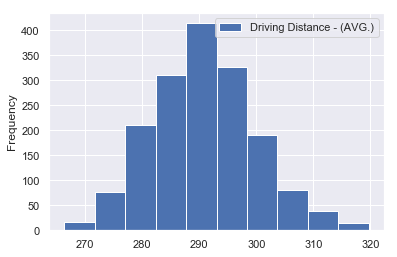

In [53]:
driving_dist_pvt[["Driving Distance - (AVG.)"]].plot(kind = "hist")

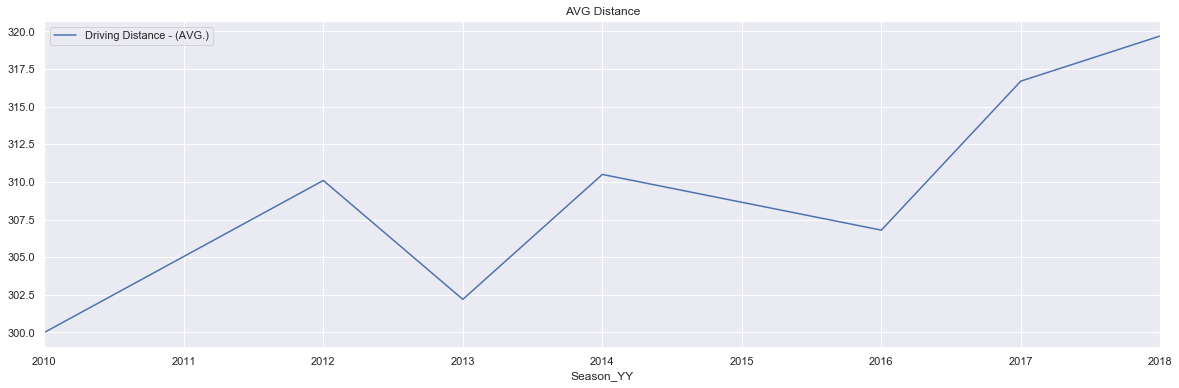

In [54]:
Rory = driving_dist_pvt[driving_dist_pvt["PlayerName"] == "Rory McIlroy"]
sns.set(rc={'figure.figsize':(20,6)})
ax = Rory[["Driving Distance - (AVG.)","Season_YY"]].plot(kind = "line",title = "AVG Distance", x= "Season_YY")
ax

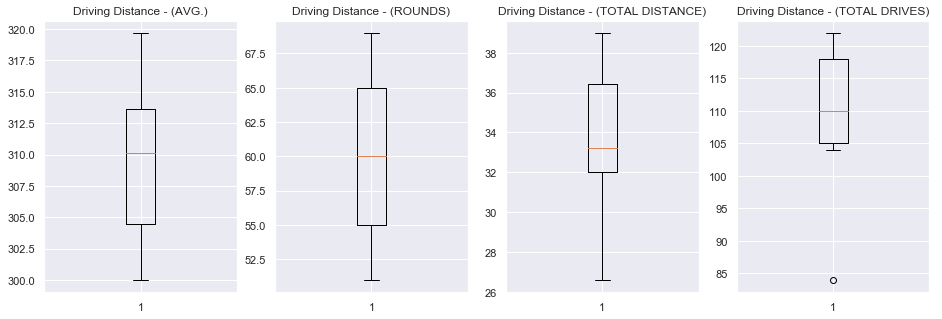

,Driving Distance - (AVG.),Driving Distance - (ROUNDS),Driving Distance - (TOTAL DISTANCE),Driving Distance - (TOTAL DRIVES)
count,7.000000,7.000000,7.000000,7.000000
mean,309.428571,60.000000,33.679286,108.857143
std,7.165127,6.658328,4.120675,12.902565
min,300.000000,51.000000,26.600000,84.000000
25%,304.500000,55.000000,32.034500,105.000000
50%,310.100000,60.000000,33.240000,110.000000
75%,313.600000,65.000000,36.423000,118.000000
max,319.700000,69.000000,39.000000,122.000000


In [55]:
plt.figure(1, figsize=(20,5))
for i in range(2,6):
    plt.subplot(1,5,i)
    plt.boxplot(Rory[Rory.columns[i]])
    plt.title(Rory.columns[i])
plt.show()
Rory.iloc[:,2:].describe()

## Export Dataframe ##

**To CSV**

In [58]:
players.to_csv("players1.csv")

<img src="images\Players.png" alt="Python" width="600"/> 

**To SQL SERVER/Database)**

In [ ]:
import sqlalchemy as sa
import pyodbc

engine = sa.create_engine("mssql+pyodbc://SOMESERVER/MYDATABASE?driver=SQL+Server+Native+Client+11.0")
dataFrame.to_sql("players", con=engine)

<img src="images\Questions.png" alt="Python" width="500"/> 